In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sys import stdout
%matplotlib notebook
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200

In [3]:
todolist=[]
def updgridaddcircle(i,ctri,r):
    global avail
    searchlist=[]
    s[i]=1
    searchlist.append(i)
    
    x0,y0=x[ctri],y[ctri]
    check(i,r,x0,y0)
    while len(todolist)!=0:
        p=todolist.pop()
        check(p,r,x0,y0)
        s[p]=1
        searchlist.append(p)
    toremove=np.searchsorted(avail,searchlist)
    avail=np.delete(avail,toremove)
        
def check(i,r,x0,y0):
    if s[i+1]==0:
        if np.sqrt((x[i+1]-x0)**2+(y[i+1]-y0)**2)<=r:
            todolist.append(i+1)
    if s[i-1]==0:
        if np.sqrt((x[i-1]-x0)**2+(y[i-1]-y0)**2)<=r:
            todolist.append(i-1)
    if s[i+L]==0:
        if np.sqrt((x[i+L]-x0)**2+(y[i+L]-y0)**2)<=r:
            todolist.append(i+L)
    if s[i-L]==0:
        if np.sqrt((x[i-L]-x0)**2+(y[i-L]-y0)**2)<=r:
            todolist.append(i-L)

In [4]:
def findr(centre):
    x,y=centre
    global radii,centres
    r=r0-np.sqrt((x-x0)**2+(y-y0)**2)
    if len(radii)==0:
        radii=np.append(radii,r)
        centres=np.append(centres,(x,y))
        #centres=np.vstack((x,y))
        return r
    #c=np.array(centres)
    if len(radii)==1:
        x1,y1=centres[0],centres[1]
    else:
        x1,y1=centres[:,0],centres[:,1]
    dist=np.sqrt((x-x1)**2+(y-y1)**2)-radii#np.array(radii)
    dist=np.append(dist,r0-np.sqrt((x-x0)**2+(y-y0)**2))
    r=np.min(dist)
    radii=np.append(radii,r)
    centres=np.vstack((centres,(x,y)))
    return r

In [5]:
def justfindr(centre):
    x,y=centre
    global radii,centres
    if len(radii)==1:
        x1,y1=centres[0],centres[1]
    else:
        x1,y1=centres[:,0],centres[:,1]
    dist=np.sqrt((x-x1)**2+(y-y1)**2)-radii
    dist=np.append(dist,r0-np.sqrt((x-x0)**2+(y-y0)**2))
    r=np.min(dist)
    return r

In [6]:
def plotcircles():
    for i in range(len(radii)):
        cc = plt.Circle(centres[i], radii[i] ,fill=False, color='b',lw=0.5)
        if i==len(radii)-1:
            cc = plt.Circle(centres[i], radii[i] ,fill=False, color='r',lw=0.5)
        ax.add_artist( cc )

In [7]:
def circlefinder(x,y):  #for "popping" bubbles
    for i in range(len(radii)):
        x1,y1=centres[i]
        if np.sqrt((x-x1)**2+(y-y1)**2)<radii[i]:
            return i
    return "False"

In [8]:
def resetaxes():
    ax.cla()
    cc = plt.Circle(( x0 , y0 ), r0 ,fill=False,color='k')
    ax.set_aspect( 1 ) 
    ax.add_artist( cc )
    ax.set_xlim([0,10])
    ax.set_ylim([0,10])

In [9]:
def notinsideothers(x,y):
    for i in range(len(radii)):
        x1,y1=centres[i]
        if np.sqrt((x-x1)**2+(y-y1)**2)<=radii[i]:
            return False
    return True

In [10]:
def randindextaker():
    global avail
    i=np.random.randint(avail.size)
    return int(avail[i])

def randpointtaker():
    x,y=2*r0*np.random.rand(),2*r0*np.random.rand()
    while np.sqrt((x-x0)**2+(y-y0)**2)>r0:
        x,y=2*r0*np.random.rand(),2*r0*np.random.rand()
    return x,y


#r1,theta=5*np.random.rand(),2*np.pi*np.random.rand()
#x,y=x0+r1*np.cos(theta),y0+r1*np.sin(theta)

In [11]:
#Grid Initializer
x0=1
y0=1
r0=1
L=2000 #no. of grid pts
x=np.zeros(L**2)
y=np.zeros(L**2)
index=np.zeros(L**2)
s=np.zeros(L**2)
for i in range(L**2):
    index[i]=i
    x[i]=(((i+1)%L)/L)*2*r0
    y[i]=((np.floor(i/L)+1)/L)*2*r0
s[np.sqrt((x-x0)**2+(y-y0)**2)>=r0]=-1
s[L**2-L:]=1
        
def gridreset():
    global s
    s=np.zeros(L**2)
    s[np.sqrt((x-x0)**2+(y-y0)**2)>=r0]=-1
    s[L**2-L:]=1

In [25]:
radii,centres=np.array([]),np.array([])
#i=int((L**2)/4-8*L)#randindextaker()
i=1097416
cx,cy=x[i],y[i]
r=findr((cx,cy))
avail=index[s==0]
gridreset()
updgridaddcircle(i,i,r)

i=1944831
cx,cy=x[i],y[i]
r=findr((cx,cy))
updgridaddcircle(i,i,r)

rs=np.zeros(L**2)
for i in index:
    i=int(i)
    if s[i]==0:
        rs[i]=justfindr((x[i],y[i]))
    #np.sqrt((x-x0)**2+(y-y0)**2)>=r0


<IPython.core.display.Javascript object>


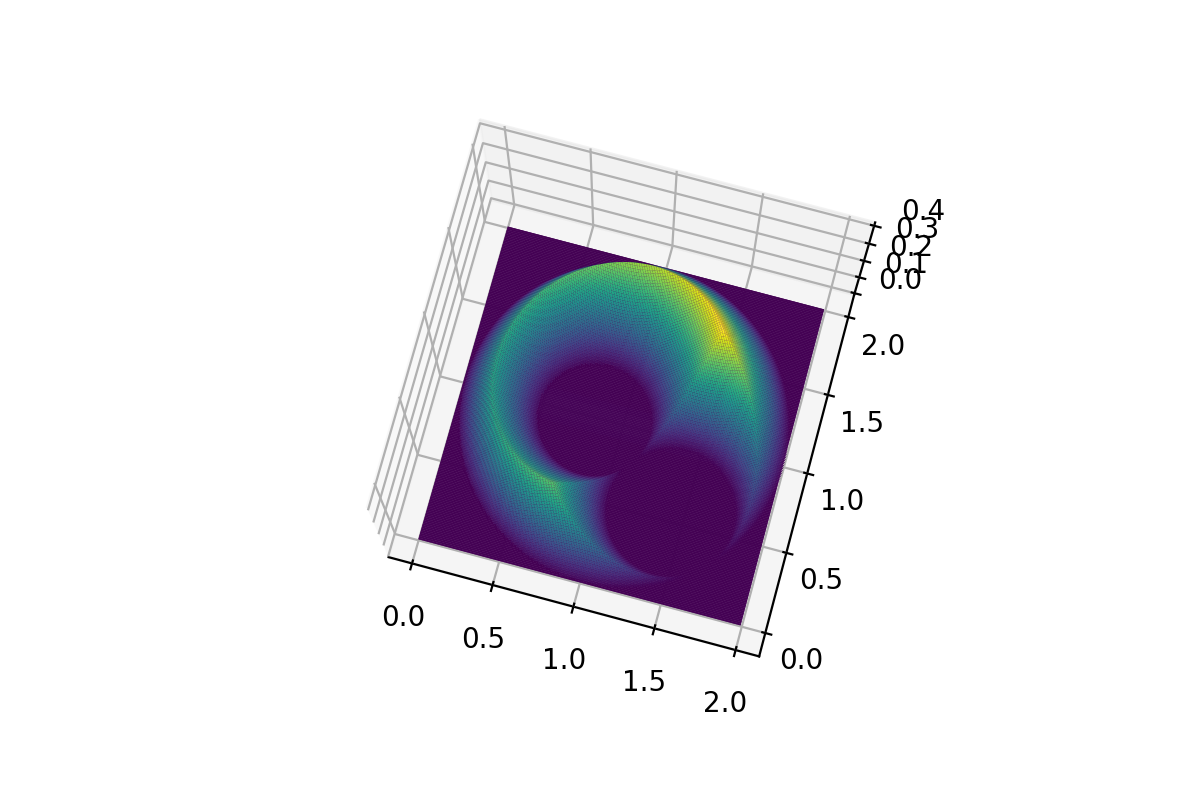

In [26]:
plt.figure()
ax = plt.axes(projection='3d')
rss=np.reshape(rs,(L,L))
xss=np.reshape(x,(L,L))
yss=np.reshape(y,(L,L))
ax.plot_surface(xss, yss, rss, rstride=10, cstride=10, cmap='viridis', edgecolor='none')

In [20]:
centres

array([[1.417, 0.549],
       [1.766, 0.899]])

In [23]:
randindextaker()

1944831

In [ ]:
runno=100
maxrunno=500
while runno<maxrunno:
    radii,centres=np.array([]),np.array([])
    gridreset()
    avail=index[s==0]
    #plt.ion()
    maxfillarea=np.pi
    p=1  #Set probability of adding circle here
    n=0
    while n<100000:
        #ax.cla()
        #resetaxes()
        toss=np.random.rand()
        if toss<p:
            try:
                i=randindextaker()
            except ValueError:
                radii,centres=np.array([]),np.array([])
                gridreset()
                avail=index[s==0]
                n=0
                i=randindextaker()
            cx,cy=x[i],y[i]
            r=findr((cx,cy))
            updgridaddcircle(i,i,r)
            if n%10==0:
                stdout.write("\r run: {} circles: {}".format(runno,n))
                stdout.flush()
            n=n+1
    with open('runs/run{}.npz'.format(runno),"wb+") as file:
        np.savez_compressed(file,radii=radii,centres=centres,s=s)
    runno=runno+1
    #plotcircles()
#fig.canvas.draw()
#fig.savefig('plots/dist.png') #fix this

sdcfg="""
    elif n>100:
        centerfound=0
        while centerfound==0:
            x,y=randpointtaker()
            i=circlefinder(x,y)
            if i!="False":
                r=radii.pop(i)
                centres.pop(i)
                fillarea=fillarea-np.pi*r*r
                n=n-1
                centerfound=1 
"""


 run: 117 circles: 45710

<IPython.core.display.Javascript object>


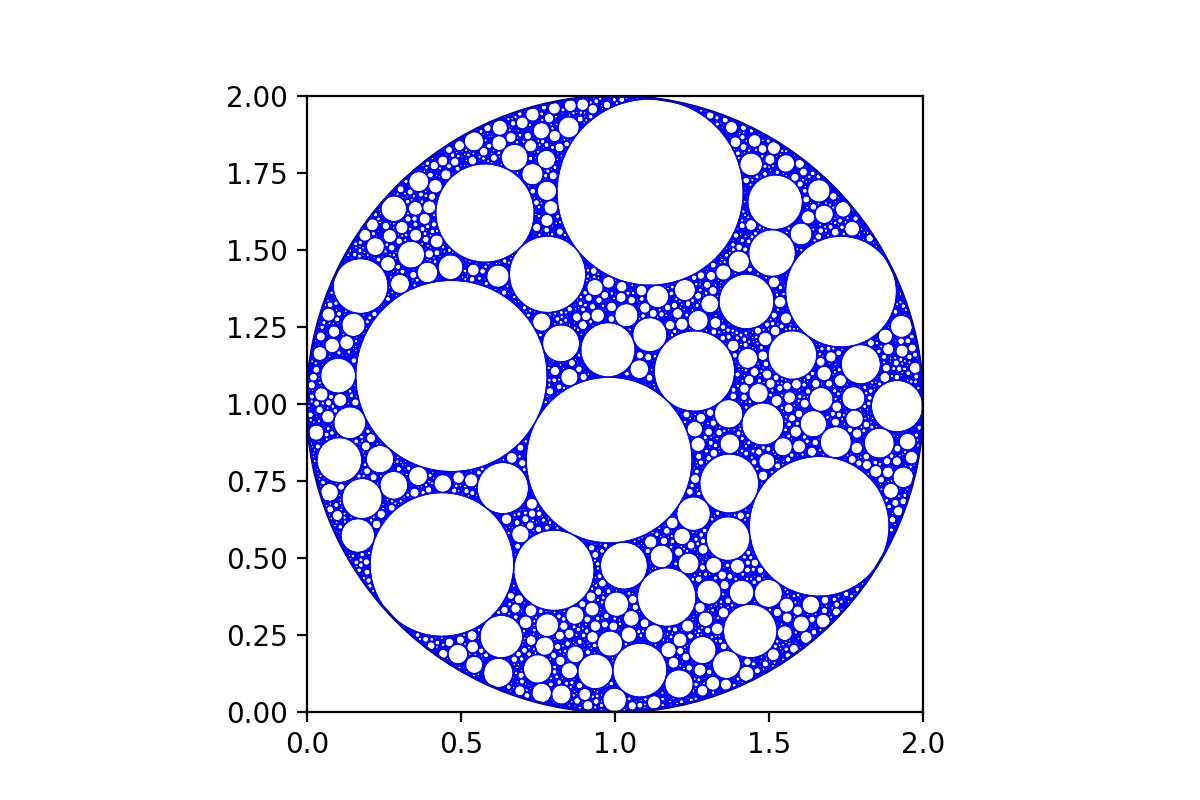

In [19]:
#draw circles here
fig, ax = plt.subplots()
ax.grid(False)
#ax.set_rticks([])
cc = plt.Circle(( x0 , y0 ), r0 ,fill=False,color='k')
ax.set_aspect(1)
ax.add_artist( cc )
ax.set_xlim([0,2*r0])
ax.set_ylim([0,2*r0])
plotcircles()

In [65]:
np.min(radii)

1.1102230246251565e-16

In [18]:
data=np.load('runs/run89.npz')
radii=data['radii']
centres=data['centres']
s=data['s']

<IPython.core.display.Javascript object>


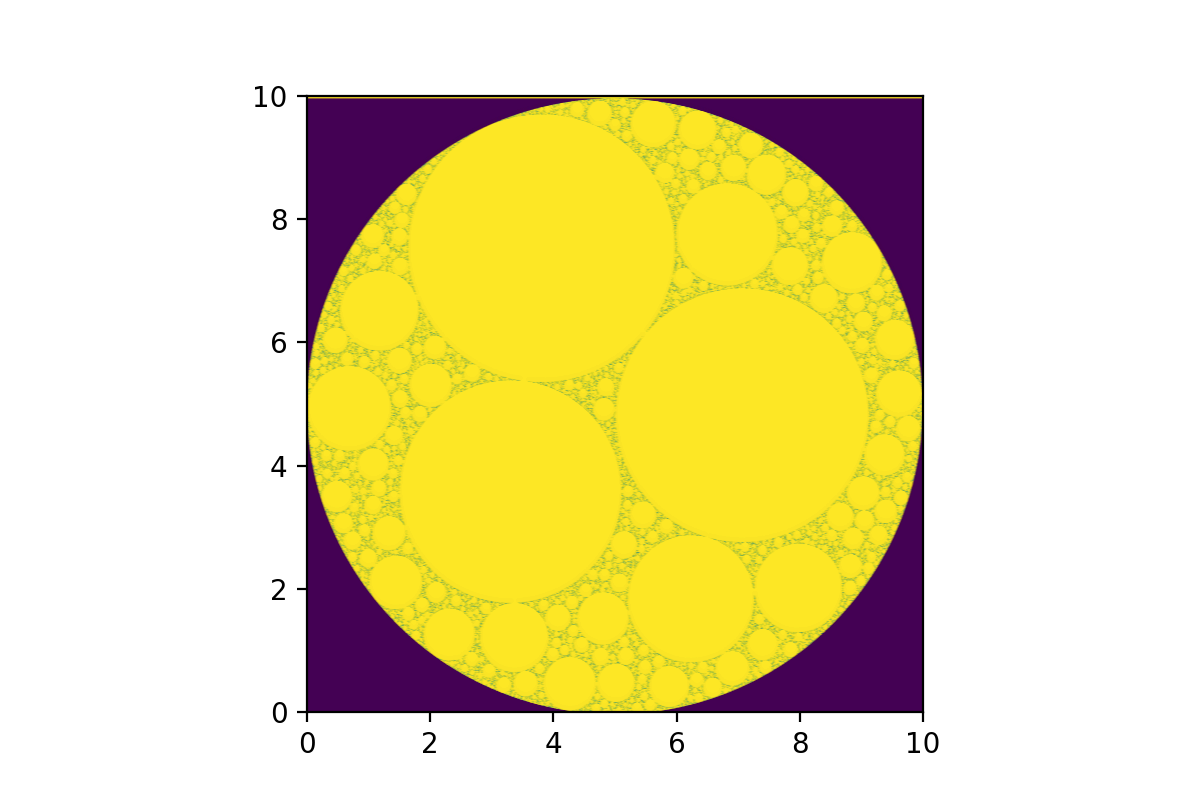

In [16]:
#visualize grid first
fig, ax = plt.subplots()
#ax.grid(False)
#ax.set_rticks([])
cc = plt.Circle(( x0 , y0 ), r0 ,fill=False,color='k')
ax.set_aspect(1)
ax.add_artist( cc )
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.scatter(x,y,s=0.5,c=s,alpha=0.25)

In [27]:
if __name__ == '__main__':
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()
    main()
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('tottime')
    stats.print_stats()

 99999         14530622 function calls (13830624 primitive calls) in 269.319 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   100000  141.237    0.001  147.688    0.001 C:\Users\Anpuj\anaconda3\lib\site-packages\numpy\lib\function_base.py:4382(delete)
   100000   52.413    0.001   74.713    0.001 C:\Users\Anpuj\AppData\Local\Temp\ipykernel_13976\1648623766.py:1(findr)
   100000   23.762    0.000  174.503    0.002 C:\Users\Anpuj\AppData\Local\Temp\ipykernel_13976\4220318347.py:1(updgridaddcircle)
1299996/599998   22.344    0.000  170.598    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   401435    5.458    0.000    5.458    0.000 C:\Users\Anpuj\anaconda3\lib\site-packages\zmq\sugar\socket.py:480(send)
        1    4.949    4.949  269.319  269.319 C:\Users\Anpuj\AppData\Local\Temp\ipykernel_13976\761066772.py:8(main)
    99999    2.045    0.000    2.045    0.000 {method 'reduce' of 'numpy.uf

In [ ]:
plt.subplots()
area=np.array(area)
plt.plot(ns,(maxfillarea-area)/maxfillarea*ns**(0.27913236),marker='o',c='r')
xs=np.log(ns)
ys=func(xs,popt[0],popt[1])
#plt.plot(xs,ys)
plt.show()

In [ ]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
popt, pcov = curve_fit(func, np.log(ns), np.log((maxfillarea-area)/maxfillarea))
print(popt)

In [36]:
hist,bin_edges=np.histogram(radii,bins=100,range=(0,1))
rs=(bin_edges[1:]+bin_edges[:-1])/2
Nr=[]
for r in rs:
    N=0
    for rad in radii:
        if rad>r:
            N=N+1
    Nr.append(N)

<IPython.core.display.Javascript object>


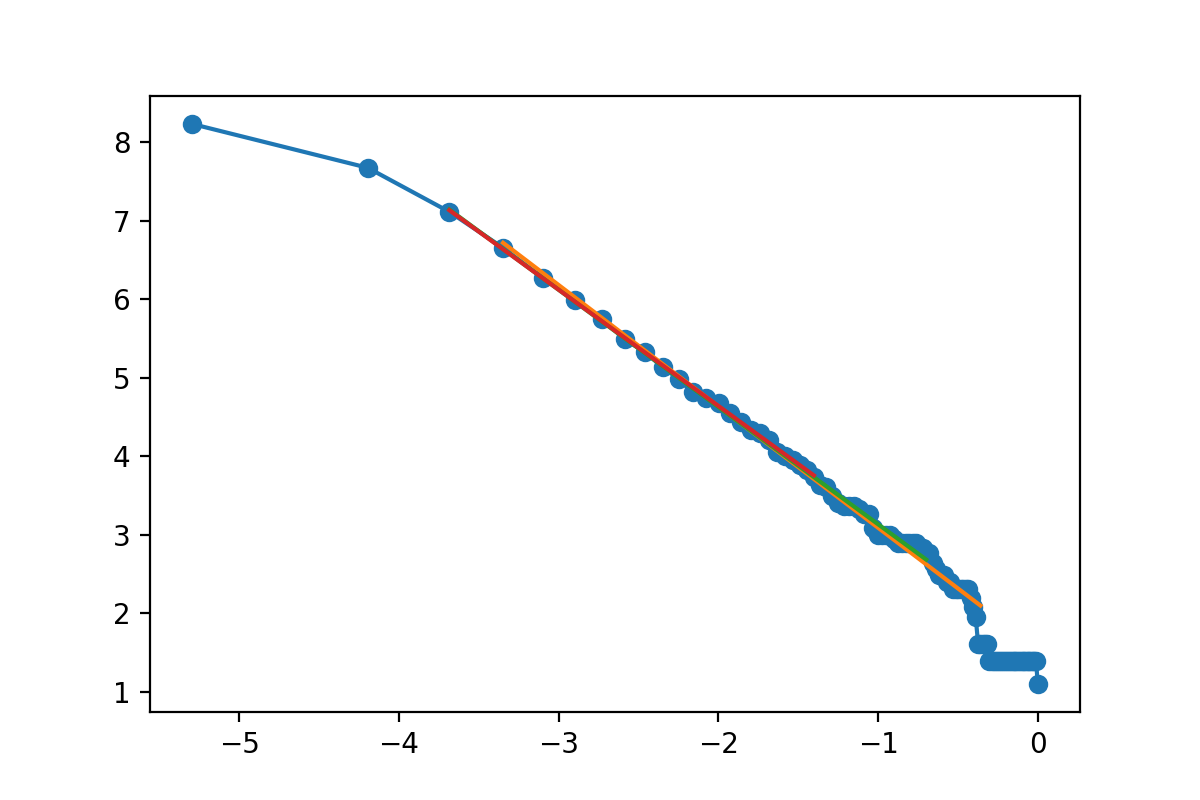

In [44]:
plt.subplots()
#plt.plot(rs,Nr)
#plt.plot(np.log10(rs),np.log10(Nr),marker='o')
plt.plot(np.log(rs/np.max(rs)),np.log(Nr),marker='o')

In [47]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
popt, pcov = curve_fit(func, np.log(rs/np.max(rs))[2:25],np.log(Nr)[2:25])
print(popt)
xs=np.log(rs/np.max(rs))[2:25]
ys=func(xs,popt[0],popt[1])
plt.plot(xs,ys)

[-1.48028092  1.68174167]


In [136]:
len(Nr)

100

In [35]:
np.min(data),np.max(radii)

(-15.670864632735492, 2.074303501728179)

In [21]:
np.sort(radii)[0:100]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.90202625e-07,
       3.77970816e-07, 3.77970817e-07, 4.14476730e-07, 4.14476730e-07,
       4.14476730e-07, 4.14476730e-07, 5.92194739e-07, 5.92194739e-07,
       5.92194739e-07, 8.55590687e-07, 8.55590687e-07, 8.55590687e-07,
       8.55590687e-07, 8.55590688e-07, 8.55590689e-07, 1.05547699e-06,
       1.05547699e-06, 1.05547699e-06, 1.75197238e-06, 1.75197238e-06,
       1.75197238e-06, 1.75197238e-06, 1.75197238e-06, 1.75197238e-06,
       1.75197238e-06, 1.75197238e-06, 1.79298340e-06, 1.79298340e-06,
       1.79298340e-06, 1.81521233e-06, 1.81521233e-06, 1.81521234e-06,
       1.81521234e-06, 1.89288063e-06, 1.89288063e-06, 1.89288063e-06,
       2.40895154e-06, 2.40895154e-06, 2.40895154e-06, 2.40895154e-06,
       2.40895154e-06, 2.50250188e-06, 2.50500939e-06, 2.56815914e-06,
      

<IPython.core.display.Javascript object>


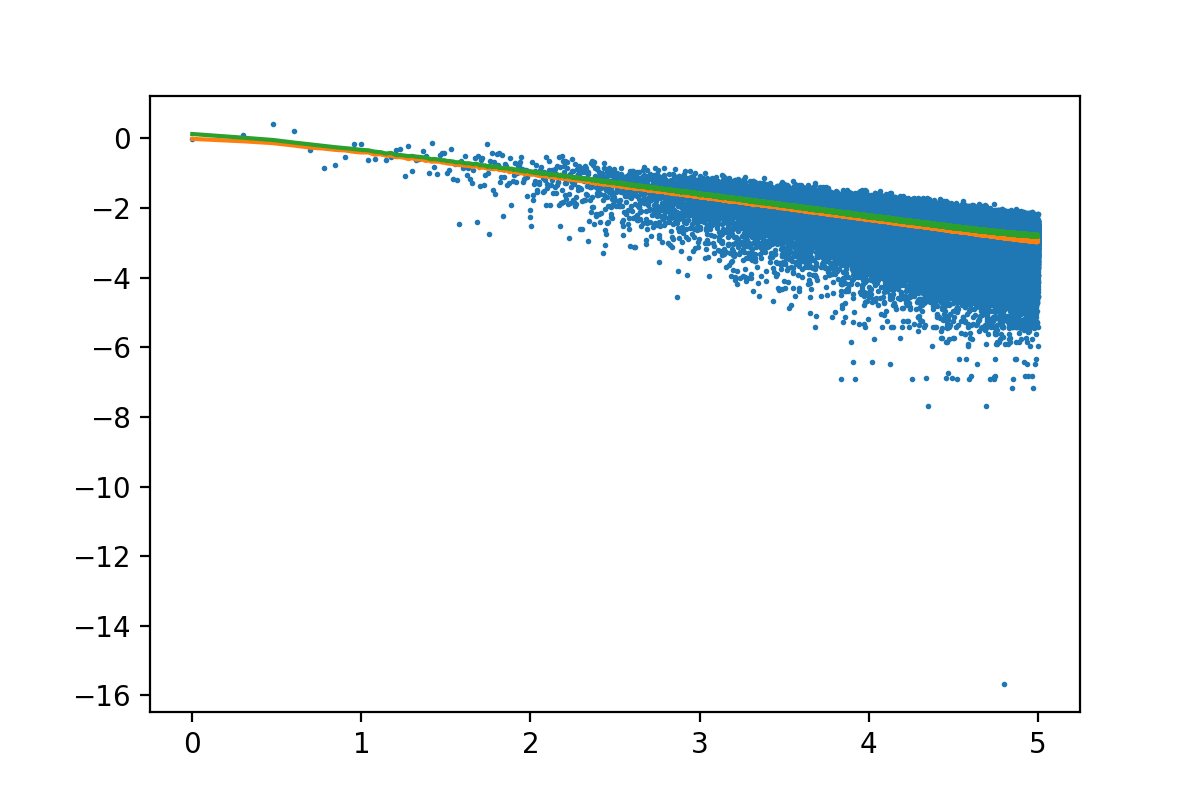

C:\Users\Anpuj\AppData\Local\Temp\ipykernel_10024\3511275280.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(ts),np.log10(radii),'o',markersize=1)


In [35]:
avgs=[]
ts=[]
for i in range(0,len(radii)):
    ts.append(i+1)
plt.figure()
#plt.plot(ts[0:1000],avgs[0:1000])
#plt.plot(np.log10(ts[0:1000]),np.log10(avgs[0:1000]),marker='o')
#plt.plot(ts[10000::10],radii[10000::10],'o',markersize=1)
plt.plot(np.log10(ts),np.log10(radii),'o',markersize=1)

In [85]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
#popt, pcov = curve_fit(func, np.log(ts[0:1000]),np.log(avgs[0:1000]))
#print(popt)
xs=np.log(ts[0:1000])
ys=func(xs,-1.5,2)
plt.plot(xs,ys)

<IPython.core.display.Javascript object>


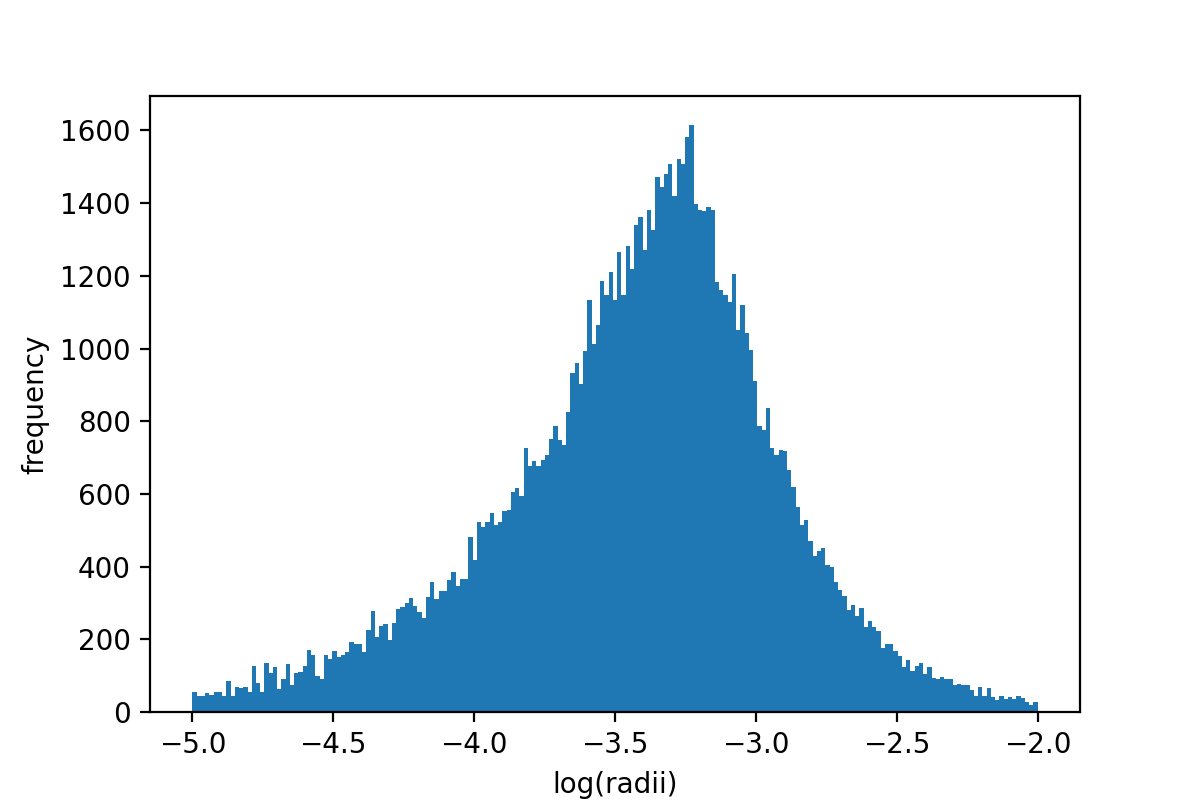

Text(0, 0.5, 'frequency')

In [60]:
plt.figure()
#fgsdfgh=plt.hist(radii,bins=np.linspace(0,0.1,1000))
hist,bins,patches=plt.hist(np.log10(radii),bins=np.linspace(-5,-2,200))
plt.xlabel('log(radii)')
plt.ylabel('frequency')

<IPython.core.display.Javascript object>


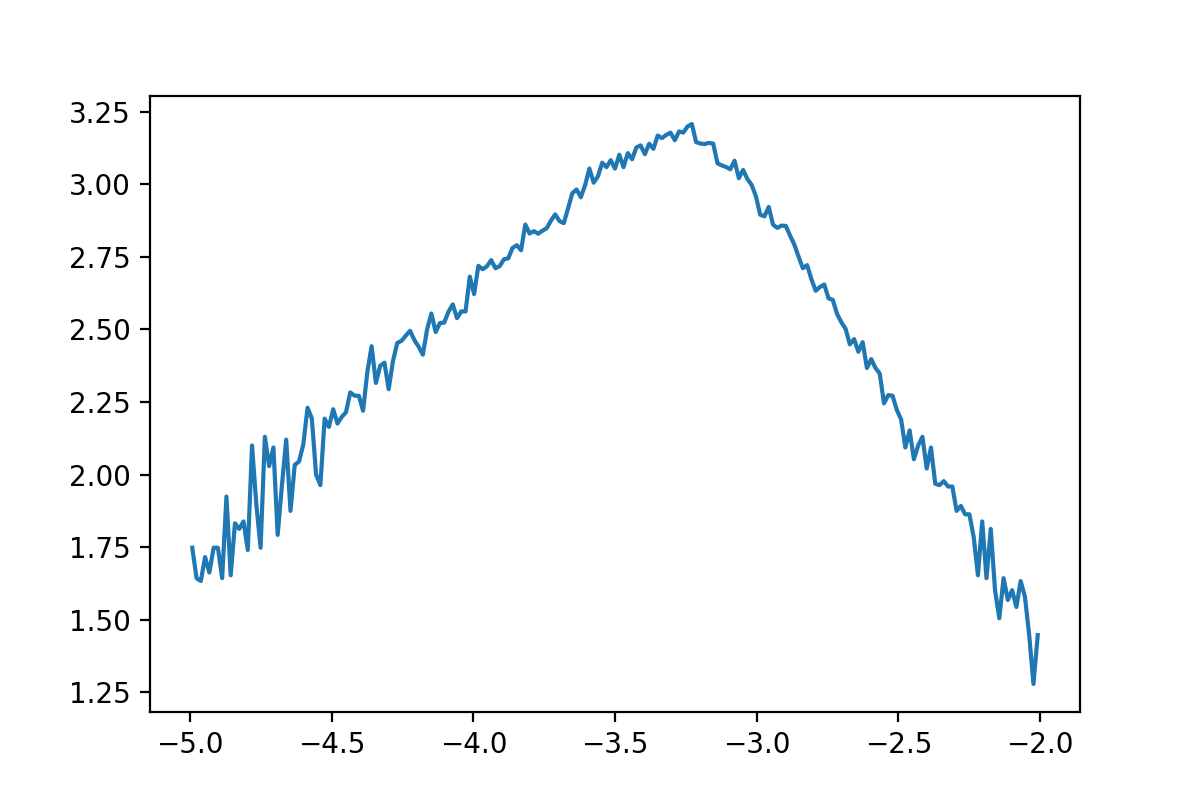

In [49]:
plt.figure()
plt.plot((bins[:-1]+bins[1:])/2,np.log10(hist))

In [15]:
from scipy.optimize import curve_fit
def normal(x, A, mu, sigma):
    p = A / np.sqrt(2 * np.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)
popt, pcov = curve_fit(normal, (bins[1:]+bins[:-1])/2,hist,p0=(1200,-3.2,1))
print(popt)
xs=(bins[1:]+bins[:-1])/2
ys=normal(xs,popt[0],popt[1],popt[2])
plt.plot(xs,ys)

[ 4.78148963e+02 -2.78643256e+00  4.70744068e-01]


[  1.61670513 -10.72996274 -14.66249667]


<IPython.core.display.Javascript object>


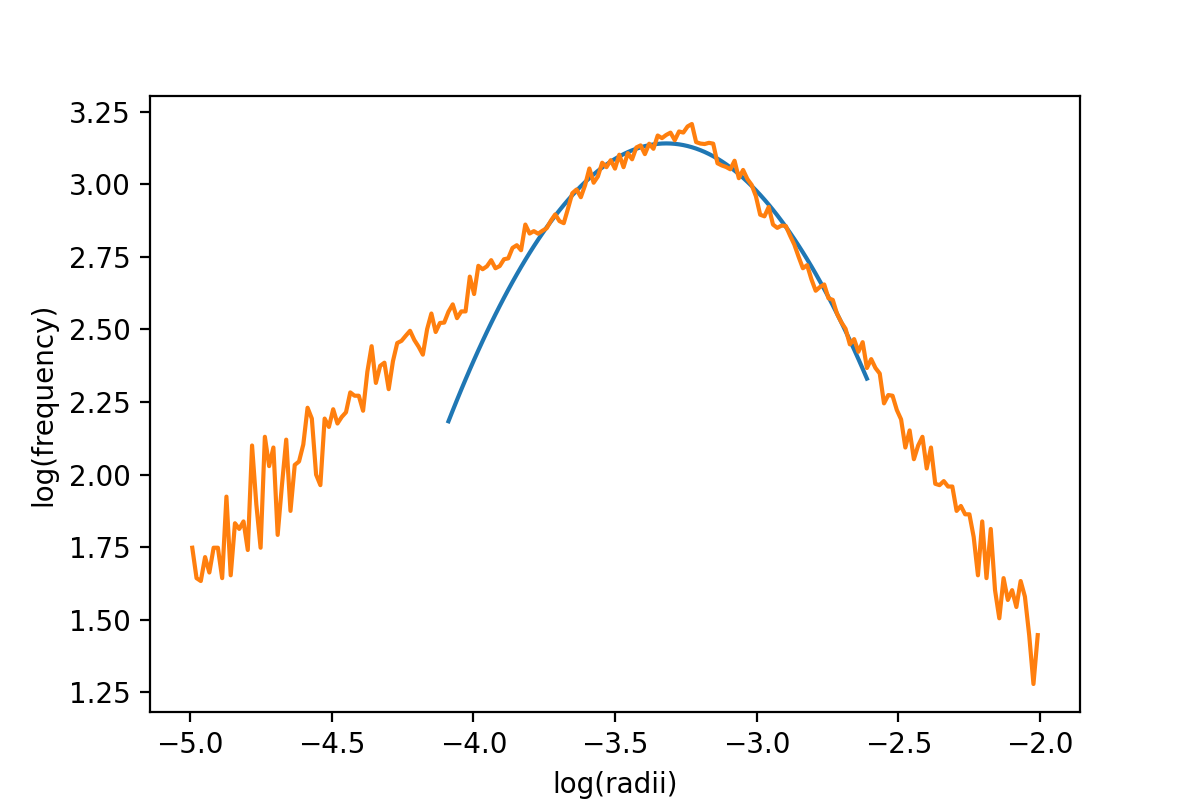

Text(0, 0.5, 'log(frequency)')

In [64]:
from scipy.optimize import curve_fit
def parabola(x, a, b , c ):
    #p = A / np.sqrt(2 * np.pi * sigma**2)
    return -a*x**2 + b*x + c
popt, pcov = curve_fit(parabola, ((bins[1:]+bins[:-1])/2)[80:-40],(np.log10(hist))[80:-40],p0=(1,-3,3.8))
print(popt)
xs=((bins[1:]+bins[:-1])/2)[60:-40]
ys=parabola(xs,popt[0],popt[1],popt[2])
plt.figure()
plt.plot(xs,ys)
plt.plot((bins[:-1]+bins[1:])/2,np.log10(hist))
plt.xlabel('log(radii)')
plt.ylabel('log(frequency)')

In [16]:
def lognormal(mu,sigma):
    return np.log(mu**2/np.sqrt(mu**2+sigma**2)),np.log(1+sigma**2/mu**2)
lognormal(popt[1],popt[2])

(1.0106913683570584, 0.028141513877613926)

<IPython.core.display.Javascript object>


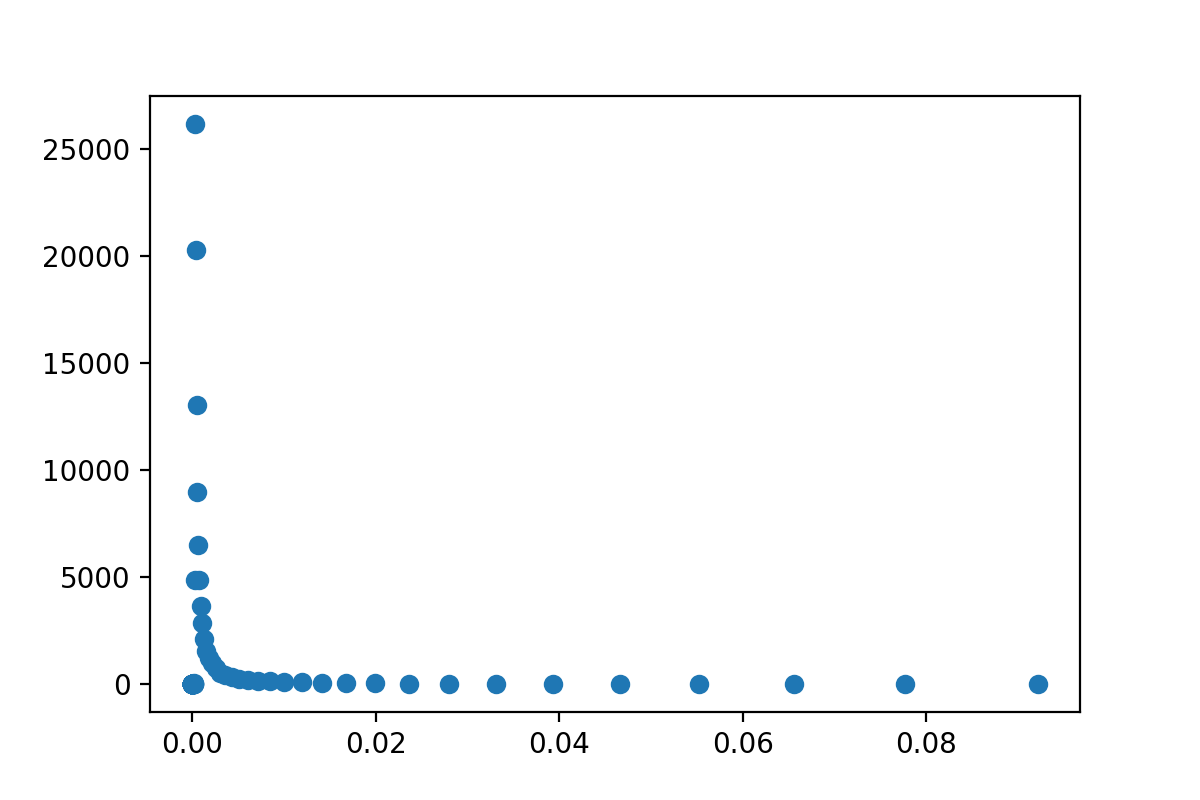

In [68]:
def plotradiusdist():
    ax2.cla()
    hist,bin_edges=np.histogram(sumrs,bins=np.logspace(np.log10(4.6979723751237834e-09),np.log10(0.1),100))
    #ax2.plot(((bin_edges[1:]+bin_edges[:-1])/2),hist/np.max(hist))
    #ax2.hist(radii,bins=np.logspace(np.log10(np.min(radii[radii>0])),np.log10(0.1),1000))
    #ax2.set_title("{} number area % {}".format(len(radii),fillarea*100/maxfillarea))
    ax2.plot((bin_edges[1:]+bin_edges[:-1])/2,hist,'o')
    
#radius distribution here
fig,ax2=plt.subplots()
plotradiusdist()

<IPython.core.display.Javascript object>


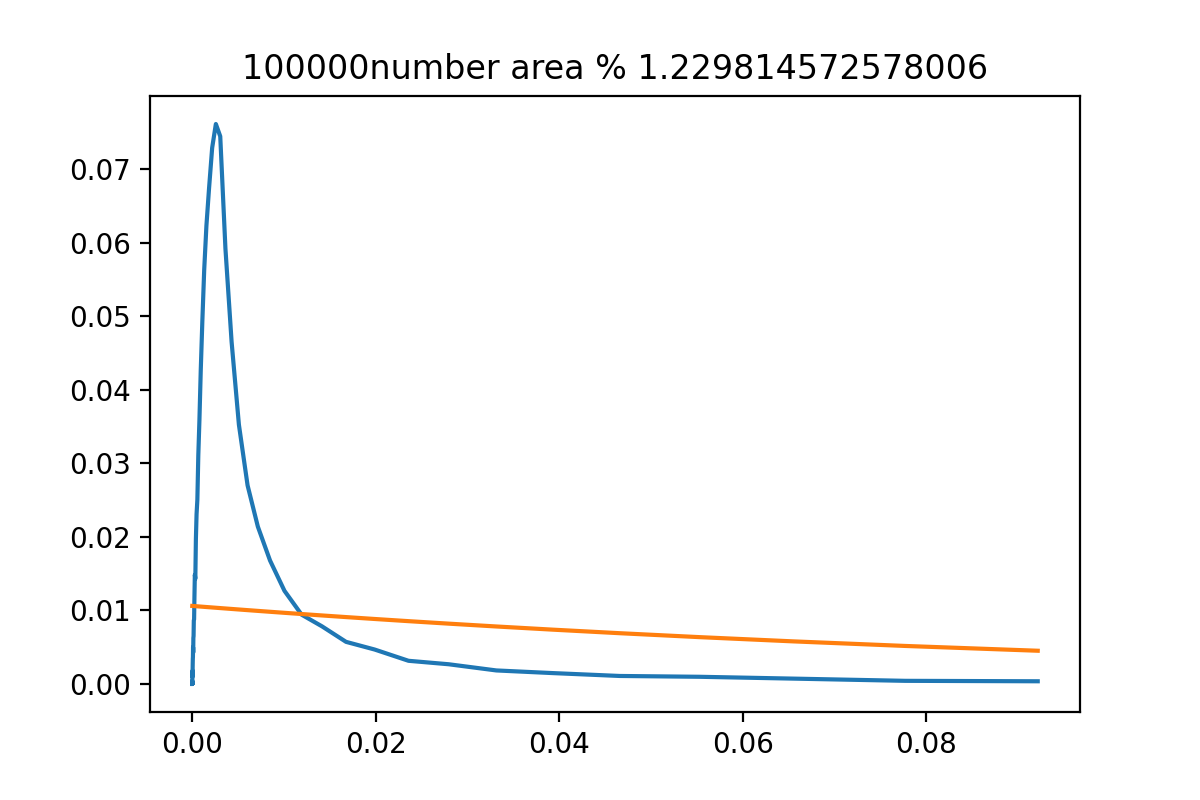

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1    2    4    0
    3    0    6    3    0    0   15    3   10    8   17   18    8   12
   42   25   56   68   71  104   97  153  124  179  169  235  290  344
  369  499  427  624  652  861  879 1182 1483 1428 1967 2304 2500 3103
 3581 4259 4920 5620 6220 6727 7277 7601 7434 5908 4644 3519 2696 2136
 1676 1264  941  783  572  468  315  268  184  148  109   98   73   43
   37]
[5.75427471e-05 1.06116071e-02]


C:\Users\Anpuj\AppData\Local\Temp\ipykernel_11184\2156723557.py:11: RuntimeWarning: invalid value encountered in power
  return A*np.exp(-lam)*(lam**x)/factorial(x)


In [76]:
fig,ax2=plt.subplots()
ax2.cla()
hist,bin_edges=np.histogram(radii,bins=np.logspace(np.log10(4.6979723751237834e-09),np.log10(0.1),100))
ax2.plot(((bin_edges[1:]+bin_edges[:-1])/2),hist/np.sum(hist))
ax2.set_title("{}number area % {}".format(len(radii),fillarea*100/maxfillarea))
print(hist[:600])

from scipy.optimize import curve_fit
from scipy.special import factorial
def lognormal(x,mu,sigma):
    return (1/(x*sigma*(2*np.pi)**0.5))*np.exp(-(np.log(x)-mu)**2/2*sigma**2)
popt, pcov = curve_fit(pois, (bin_edges[1:]+bin_edges[:-1])/2,hist/np.sum(hist),p0=(1,100))
print(popt)
xs=(bin_edges[1:]+bin_edges[:-1])/2
ys=pois(xs,popt[0],popt[1])
plt.plot(xs,ys)


In [61]:
avail=index[s==0]
avail.size

70466

In [11]:
np.nonzero(radii)

(array([    0,     1,     2, ..., 99997, 99998, 99999], dtype=int64),)

In [70]:
np.logspace(np.log10(4.6979723751237834e-09),np.log10(0.1),1000)

array([4.69797238e-09, 4.77799712e-09, 4.85938500e-09, 4.94215923e-09,
       5.02634343e-09, 5.11196161e-09, 5.19903820e-09, 5.28759805e-09,
       5.37766641e-09, 5.46926899e-09, 5.56243192e-09, 5.65718177e-09,
       5.75354558e-09, 5.85155085e-09, 5.95122552e-09, 6.05259804e-09,
       6.15569734e-09, 6.26055281e-09, 6.36719438e-09, 6.47565247e-09,
       6.58595802e-09, 6.69814250e-09, 6.81223793e-09, 6.92827684e-09,
       7.04629235e-09, 7.16631812e-09, 7.28838839e-09, 7.41253800e-09,
       7.53880236e-09, 7.66721749e-09, 7.79782003e-09, 7.93064724e-09,
       8.06573702e-09, 8.20312789e-09, 8.34285907e-09, 8.48497042e-09,
       8.62950247e-09, 8.77649647e-09, 8.92599435e-09, 9.07803875e-09,
       9.23267307e-09, 9.38994141e-09, 9.54988864e-09, 9.71256039e-09,
       9.87800308e-09, 1.00462639e-08, 1.02173909e-08, 1.03914328e-08,
       1.05684393e-08, 1.07484609e-08, 1.09315490e-08, 1.11177558e-08,
       1.13071345e-08, 1.14997390e-08, 1.16956242e-08, 1.18948462e-08,
      

In [20]:
np.savez('run1',radii=radii,centres=centres)

In [36]:
timepts=[10,100,1000,10000,50000,90000]
timepts=[10,25,50,90,170]#range(10,201,40)
maxrunno=1000
rs=np.zeros((maxrunno,len(timepts)))
for run in range(maxrunno):
    data=np.load('runs/run{}.npz'.format(run))
    radii=data['radii']
    for t in timepts:
        rs[run,timepts.index(t)]=radii[t]

<IPython.core.display.Javascript object>


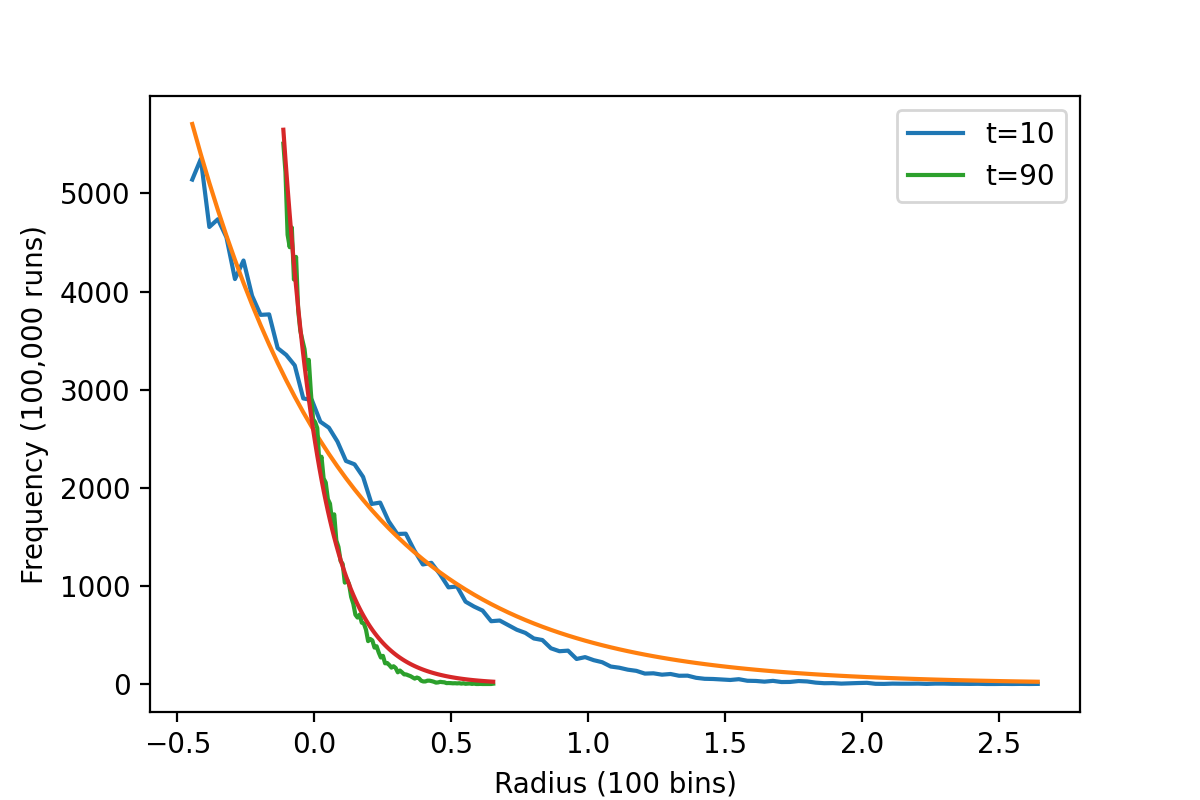

[ 2.57511147e+03 -1.78434706e+00]
[2504.43143004   -7.16119318]


In [79]:
plt.figure()
for j in range(0,int(len(timepts)/2),2):
    mean=np.mean(rs[:,j])
    hist,bins=np.histogram(rs[:,j]-mean,bins=100)
    
    if j in [0,8]:
        plt.plot((bins[1:]+bins[:-1])/2,hist,label='t={}'.format(timepts[j]))
        popt, pcov = curve_fit(func, (bins[1:]+bins[:-1])/2,hist)
        print(popt)
        xs=(bins[1:]+bins[:-1])/2
        ys=func(xs,popt[0],popt[1])
        plt.plot(xs,ys)
plt.legend()
plt.xlabel('Radius (100 bins)')
plt.ylabel('Frequency (100,000 runs)')
plt.show()

In [78]:
from scipy.optimize import curve_fit
def func(x,A,p):
    return A*np.exp(p*x)

In [16]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c

<IPython.core.display.Javascript object>


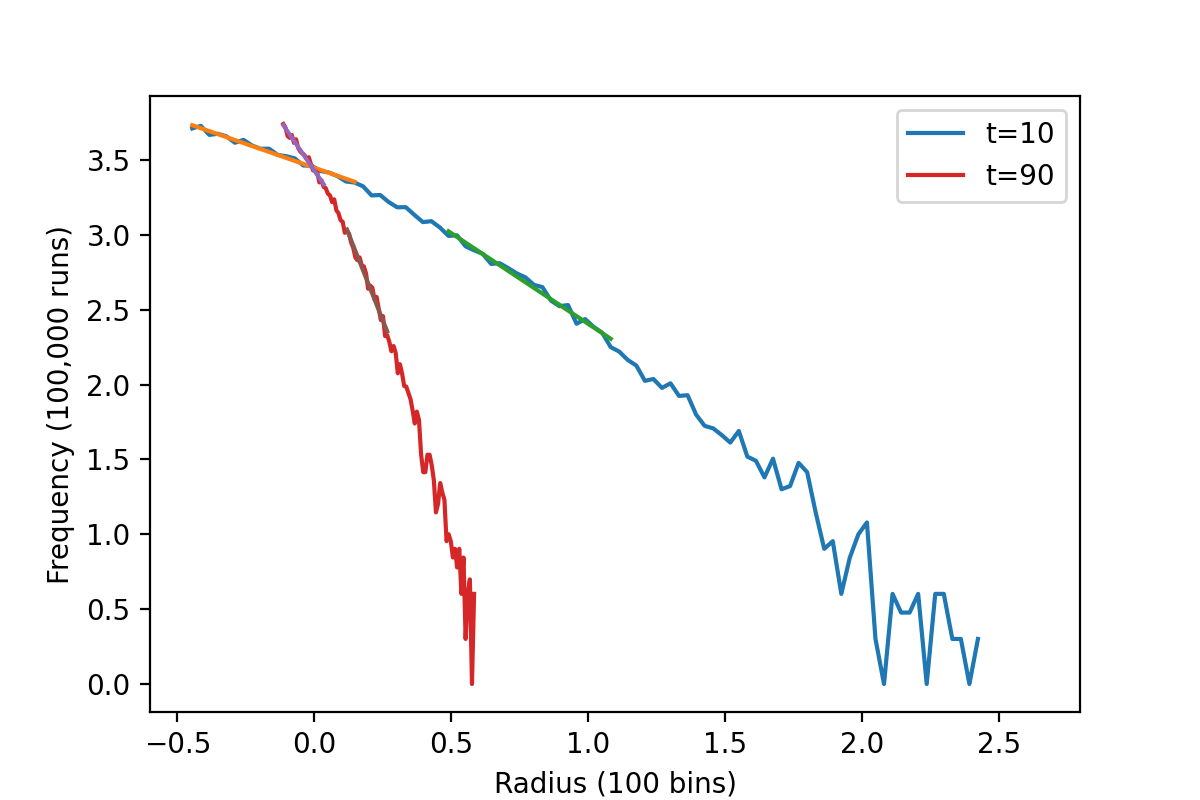

[-0.63726428  3.44855035]
[-1.21234332  3.61705637]
[-2.68095468  3.42817642]
[-4.6313976   3.58463326]


C:\Users\Anpuj\AppData\Local\Temp\ipykernel_5488\750400745.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot((bins[1:]+bins[:-1])/2,np.log10(hist),label='t={}'.format(timepts[j]))
C:\Users\Anpuj\AppData\Local\Temp\ipykernel_5488\750400745.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot((bins[1:]+bins[:-1])/2,np.log10(hist),label='t={}'.format(timepts[j]))


In [88]:
plt.figure()
for j in range(0,int(len(timepts)/2),2):
    mean=np.mean(rs[:,j])
    hist,bins=np.histogram(rs[:,j]-mean,bins=100)
    if j in [0,8]:
        plt.plot((bins[1:]+bins[:-1])/2,np.log10(hist),label='t={}'.format(timepts[j]))
        popt, pcov = curve_fit(func, ((bins[1:]+bins[:-1])/2)[hist>0][:20],np.log10(hist[hist>0])[:20])
        print(popt)
        xs=((bins[1:]+bins[:-1])/2) [:20]
        ys=func(xs,popt[0],popt[1])
        plt.plot(xs,ys)
        
        popt, pcov = curve_fit(func, ((bins[1:]+bins[:-1])/2)[hist>0][30:50],np.log10(hist[hist>0])[30:50])
        print(popt)
        xs=((bins[1:]+bins[:-1])/2)[30:50]
        ys=func(xs,popt[0],popt[1])
        plt.plot(xs,ys)
plt.legend()
plt.xlabel('Radius (100 bins)')
plt.ylabel('Frequency (100,000 runs)')
plt.show()

In [14]:
maxrunno=1000
for run in range(0,maxrunno):
    data=np.load('runs/run{}.npz'.format(run))
    radii=data['radii']
    centres=data['centres']
    x=centres[:,0]
    y=centres[:,1]
    #s=data['s']
    if run==0:
        sumrs=radii
        sqsumrs=radii**2
        rs=np.sqrt((x-x0)**2+(y-y0)**2)
        H, xedges, yedges = np.histogram2d(x, y, bins=1000)
    else:
        sumrs=sumrs+radii
        sqsumrs=sqsumrs+radii**2
        rs=np.append(rs,np.sqrt((x-x0)**2+(y-y0)**2))
        H1, xedges1, yedges1 = np.histogram2d(x, y, bins=(xedges, yedges))
        H=H+H1
sumrs=sumrs/maxrunno

In [59]:
rs.shape

(10000000,)

<IPython.core.display.Javascript object>


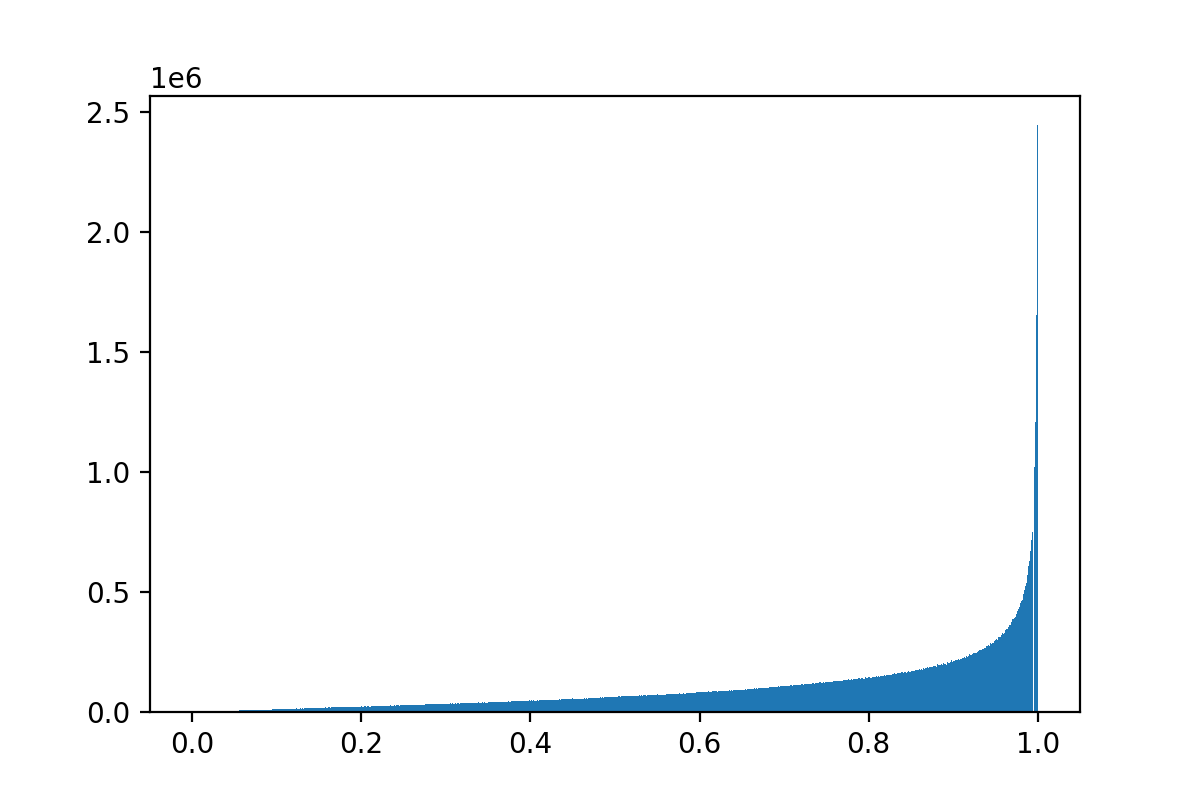

In [15]:
plt.figure()
hist,bins,patches=plt.hist(rs,bins=1000)

<IPython.core.display.Javascript object>


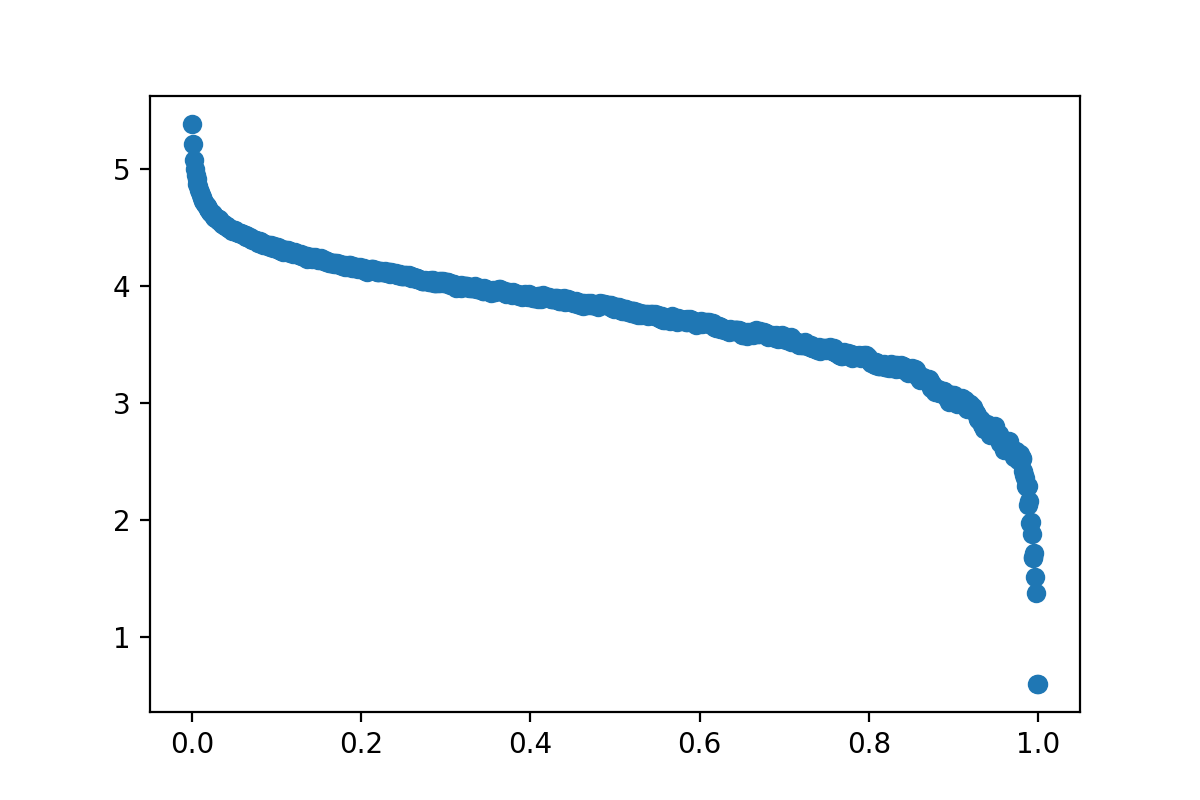

In [37]:
xs=(bins[1:]+bins[:-1])/2
plt.figure()
plt.plot(np.log10(1-xs),np.log10(hist),'o')

In [10]:
xedg=(xedges[:-1]+xedges[1:])/2
yedg=(yedges[:-1]+yedges[1:])/2
Hist=np.zeros(len(xedg))
for i in range(len(xedg)):
    for j in range(len(yedg)):
        r=np.sqrt((xedg[i]-5)**2+(yedg[j]-5)**2) #change to x0,y0 later
        index=np.searchsorted(xedges,r)
        if index<len(Hist):
            Hist[index]+=H[i,j]

<IPython.core.display.Javascript object>


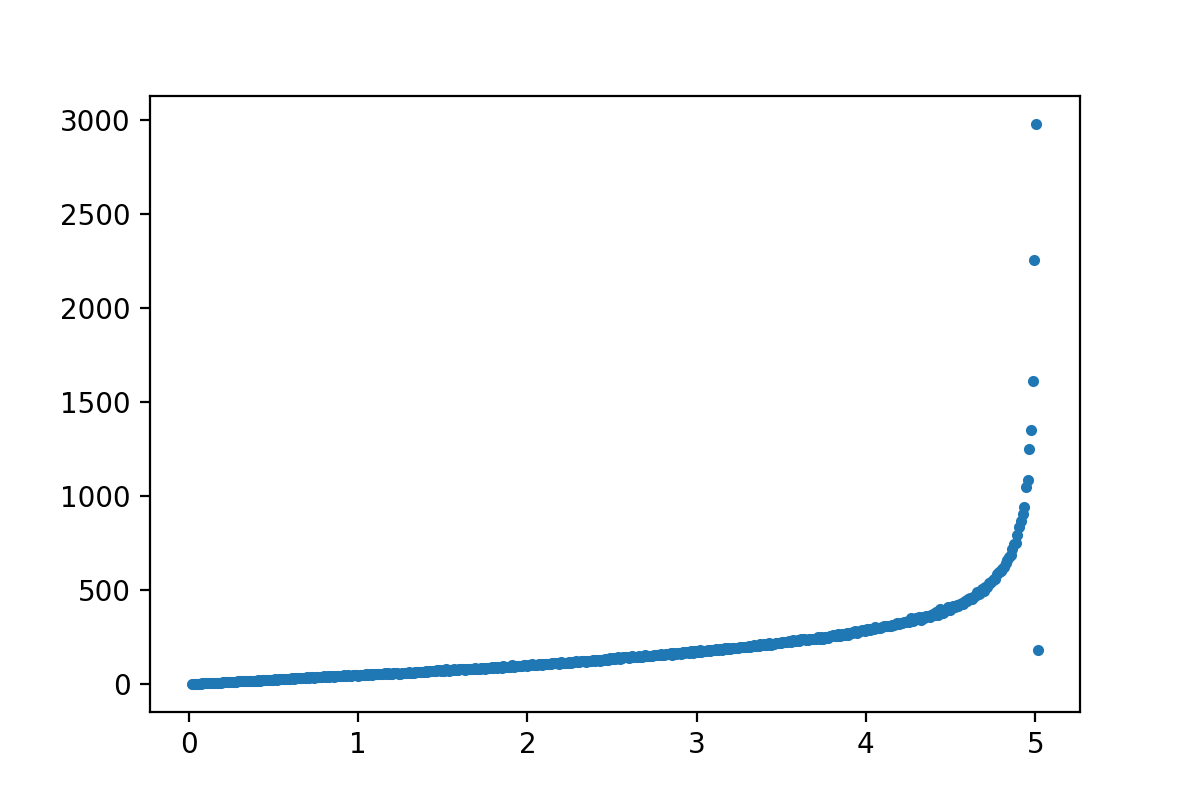

In [17]:
plt.figure()
plt.plot(xedg[Hist>0],Hist[Hist>0]/10**3,'.')

<IPython.core.display.Javascript object>


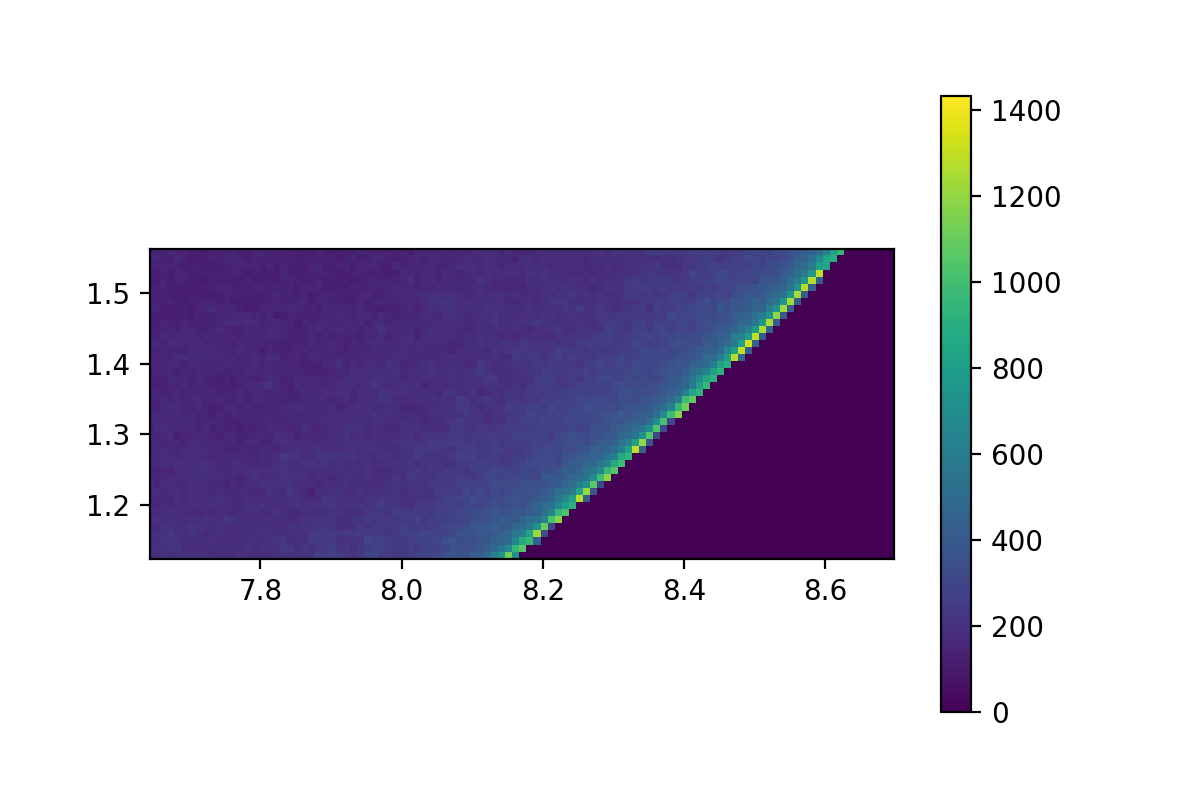

In [15]:
fig,ax=plt.subplots()
X, Y = np.meshgrid(xedges, yedges)
ax.set_aspect(1)
p=ax.pcolormesh(X, Y, H,cmap='viridis')
fig.colorbar(p)
mean=sumrs/maxrunno
var=sqsumrs/maxrunno - mean**2

<IPython.core.display.Javascript object>


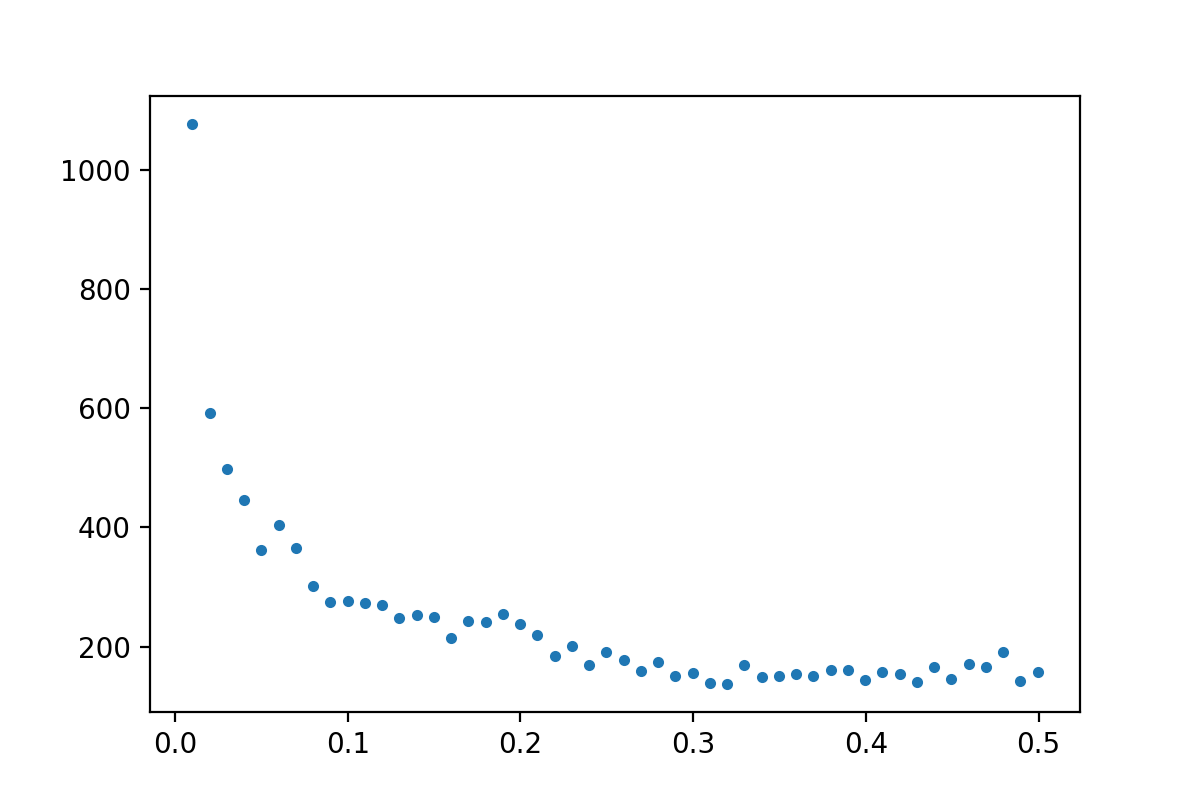

In [16]:
plt.figure()
xvals=(X[500,:-1]+X[500,1:])/2
plt.plot(xvals[:50],H[500,:][:50],'.')

In [17]:
H.shape

(1000, 1000)

<IPython.core.display.Javascript object>


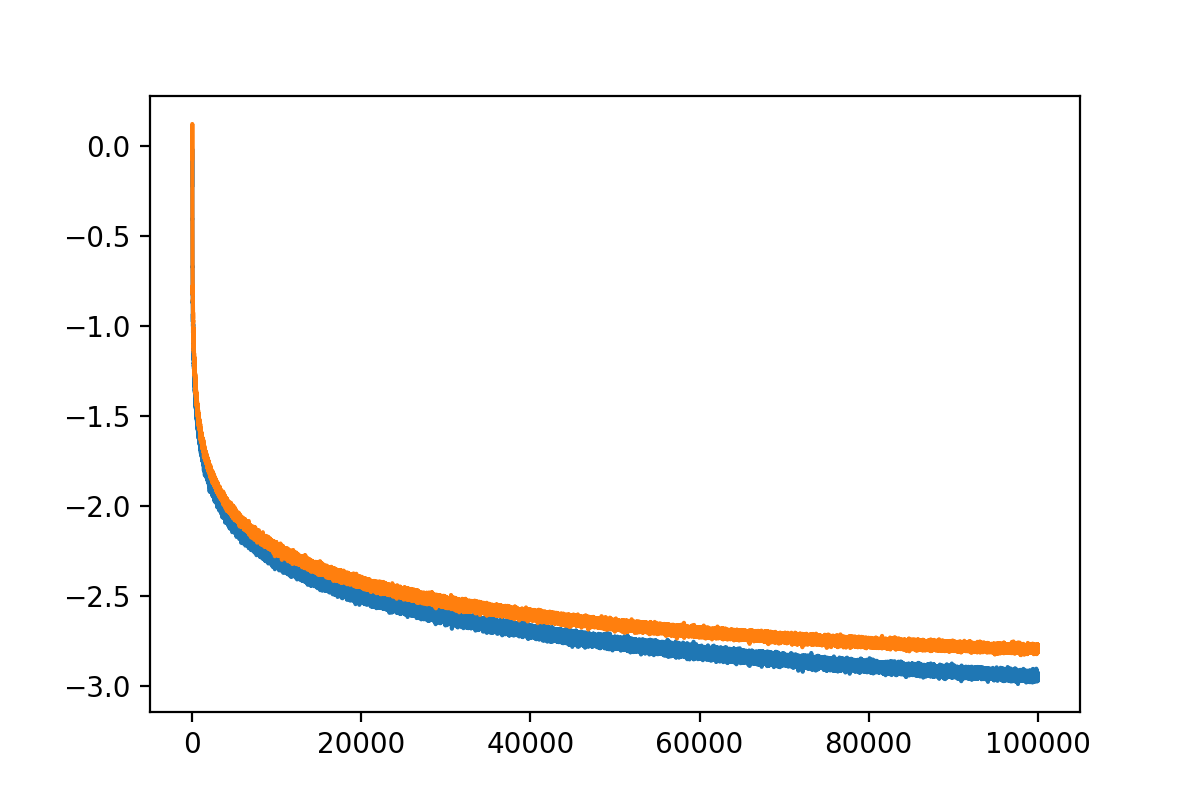

In [41]:
plt.figure()
plt.plot(range(1,len(var**0.5)+1),np.log10(var**0.5),range(1,len(mean)+1),np.log10(mean))

In [35]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
popt, pcov = curve_fit(func, np.log10(range(1,len(var**0.5)+1))[100:],np.log10(var**0.5)[100:])
print(popt)
xs=np.log10(range(1,len(var**0.5)+1))
ys=func(xs,popt[0],popt[1])
plt.plot(xs,ys)

[-0.64558318  0.27356354]


In [40]:
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
popt, pcov = curve_fit(func, np.log10(range(1,len(mean)+1))[1000:-50000],np.log10(mean)[1000:-50000],p0=(-0.7,1))
print(popt)
xs=np.log10(range(1,len(mean)+1))
ys=func(xs,popt[0],popt[1])
plt.plot(xs,ys)

[-0.62261681  0.25656273]


In [55]:
#count 0s
maxrunno=1000
zeros=[]
minim=[]
for run in range(maxrunno):
    print(run)
    data=np.load('runs/run{}.npz'.format(run))
    radii=data['radii']
    zeros.append(len(radii)-np.count_nonzero(radii))
    radii=radii[radii>0]
    minim.append(np.min(radii))
    #centres=data['centres']
    #s=data['s']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [56]:
print(zeros,minim)

[9, 15, 9, 13, 10, 9, 11, 9, 10, 9, 11, 9, 10, 12, 15, 7, 12, 9, 17, 7, 6, 18, 9, 8, 10, 3, 11, 13, 10, 11, 11, 11, 9, 14, 14, 14, 10, 9, 12, 13, 10, 14, 10, 8, 13, 14, 10, 11, 9, 11, 9, 9, 8, 12, 13, 16, 14, 11, 14, 16, 5, 3, 10, 13, 11, 12, 12, 13, 9, 11, 18, 11, 11, 9, 17, 7, 9, 6, 19, 15, 13, 11, 11, 8, 16, 10, 16, 13, 8, 7, 10, 10, 5, 7, 11, 8, 14, 9, 11, 6, 11, 9, 11, 9, 9, 12, 12, 12, 15, 12, 9, 9, 11, 10, 9, 10, 9, 15, 14, 7, 11, 7, 10, 13, 11, 10, 11, 12, 13, 10, 11, 8, 11, 8, 8, 14, 12, 14, 12, 14, 8, 5, 8, 13, 15, 11, 11, 13, 9, 16, 13, 10, 15, 10, 8, 10, 15, 12, 10, 10, 12, 9, 12, 12, 11, 14, 9, 12, 11, 6, 10, 8, 10, 11, 9, 7, 11, 11, 6, 10, 14, 7, 7, 9, 8, 8, 14, 11, 8, 13, 11, 8, 16, 10, 11, 9, 13, 11, 13, 9, 10, 10, 9, 12, 15, 11, 9, 7, 12, 11, 11, 14, 10, 15, 5, 18, 11, 11, 12, 8, 8, 16, 13, 15, 15, 13, 10, 10, 11, 10, 12, 11, 21, 10, 12, 11, 12, 7, 6, 10, 11, 11, 11, 9, 9, 14, 11, 9, 10, 16, 12, 13, 7, 11, 7, 9, 15, 13, 11, 11, 11, 9, 8, 10, 7, 7, 10, 10, 8, 13, 12, 14

In [ ]:
hist,bin_edges=np.histogram(radii,bins=1000,range=(0,1))
    #hist,bin_edges=np.histogram(radii,bins=np.logspace(np.log10(4.6979723751237834e-09),np.log10(0.1),100))
    rs=(bin_edges[1:]+bin_edges[:-1])/2
    Nr=[]
    for r in rs:
        N=np.count_nonzero(radii>r)
        Nr.append(N)
    if run==0:
        sumNr=np.array(Nr)
    else:
        sumNr=sumNr+np.array(Nr)
    areas=np.pi*radii**2
    porespace=[]
    for i in range(len(radii)):
        fillarea=np.sum(areas[:i])/maxfillarea
        porespace.append(1-fillarea)
    if run==0:
        sumps=np.array(porespace)
    else:
        sumps=sumps+np.array(porespace)
sumNr=sumNr/maxrunno
sumps=sumps/maxrunno

<IPython.core.display.Javascript object>


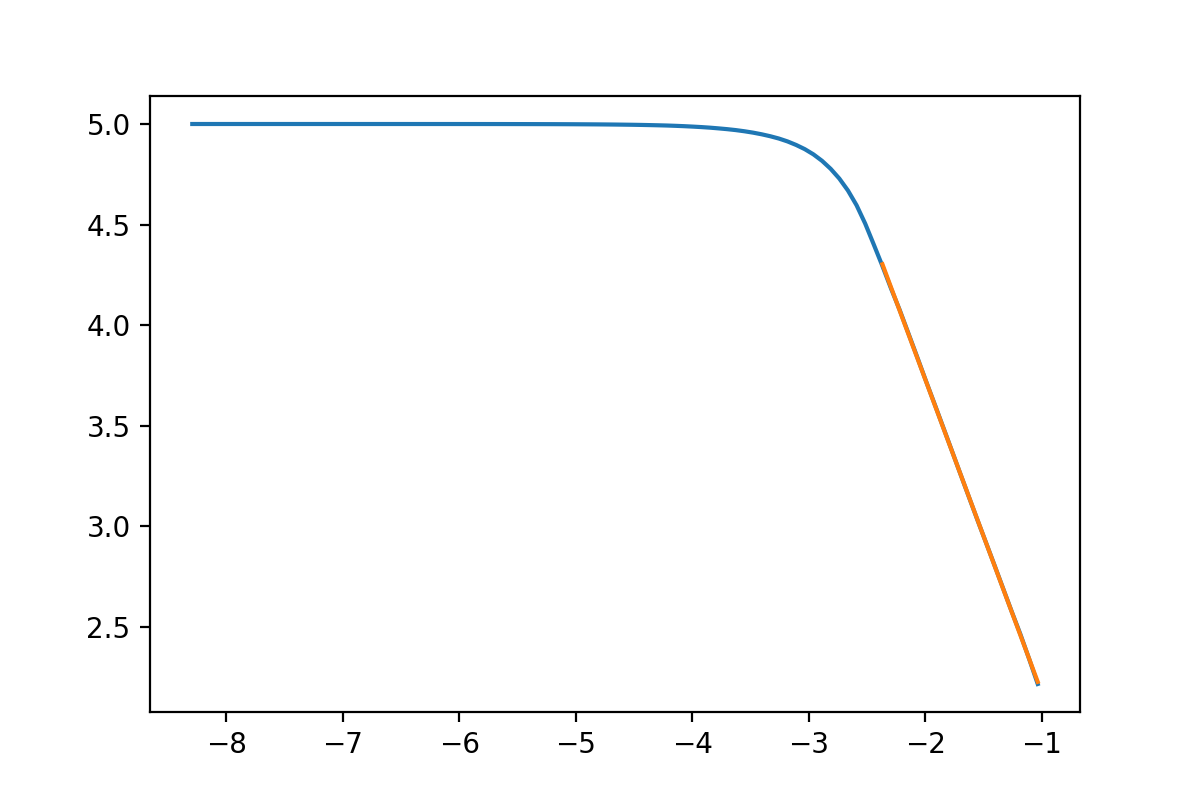

[-1.5586455   0.61184582]


<IPython.core.display.Javascript object>


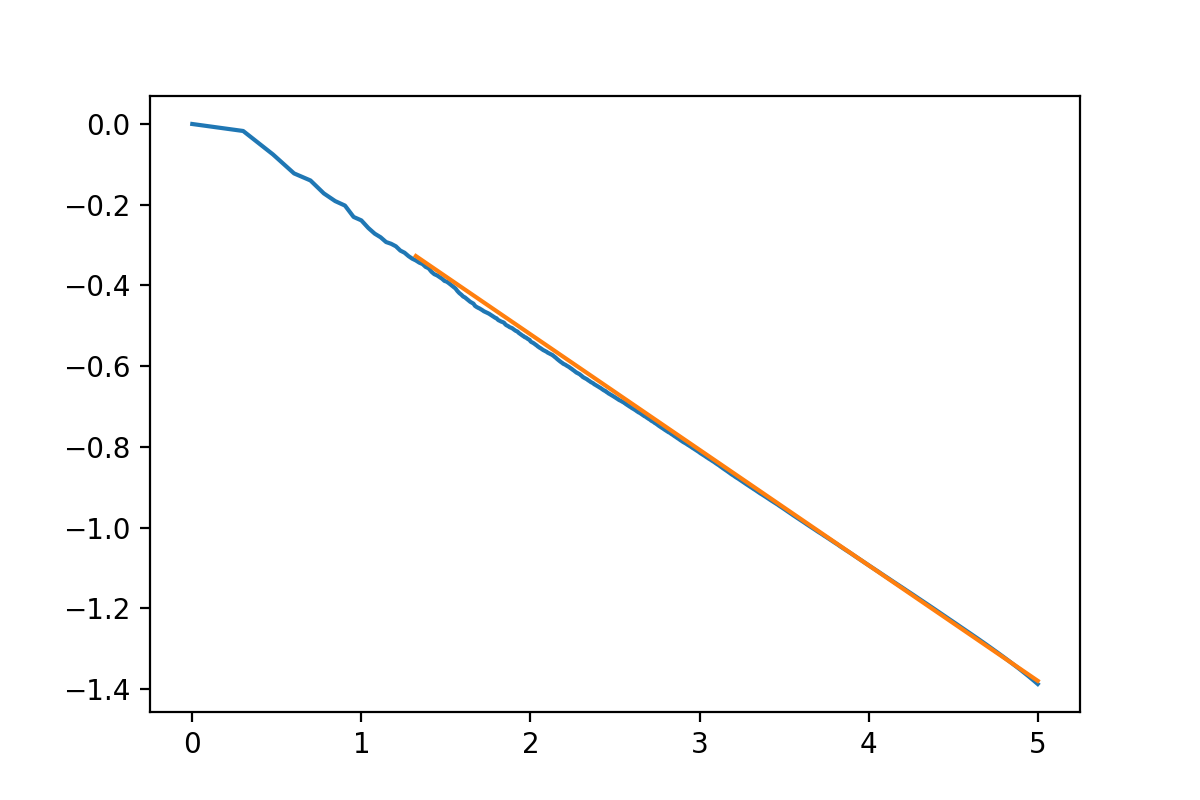

[-0.28611115  0.05117931]


In [67]:
plt.figure()
#plt.plot(rs,sumNr)
plt.plot(np.log10(rs),np.log10(sumNr))
from scipy.optimize import curve_fit
def func(x,m,c):
    return m*x+c
xs=np.log10(rs)[80:]
popt, pcov = curve_fit(func, xs,np.log10(sumNr)[80:])
print(popt)
ys=func(xs,popt[0],popt[1])
plt.plot(xs,ys)

plt.figure()
plt.plot(np.log10(range(1,len(radii)+1)),np.log10(sumps))
xs=np.log10(range(1,len(radii)+1))[20:]
popt, pcov = curve_fit(func, xs,np.log10(sumps)[20:])
print(popt)
ys=func(xs,popt[0],popt[1])
plt.plot(xs,ys)

<IPython.core.display.Javascript object>


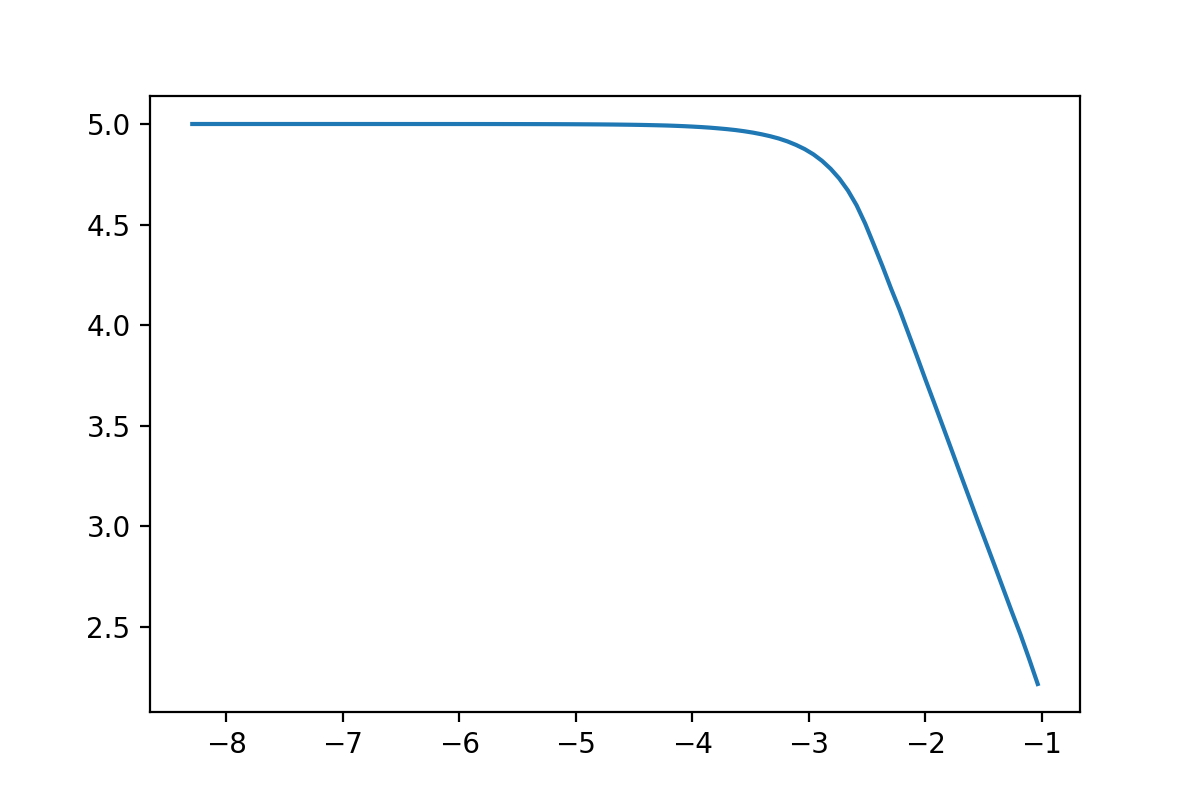

In [62]:
plt.figure()
plt.plot(np.log10(rs),np.log10(sumNr))

In [14]:
#coords1=circles1[:,:-1]
from rdfpy import rdf
g_r1, radii1 = rdf(centres[:10000], dr=0.01)

#radii1=radii1/radii1[g_r1.argmax()]

<IPython.core.display.Javascript object>


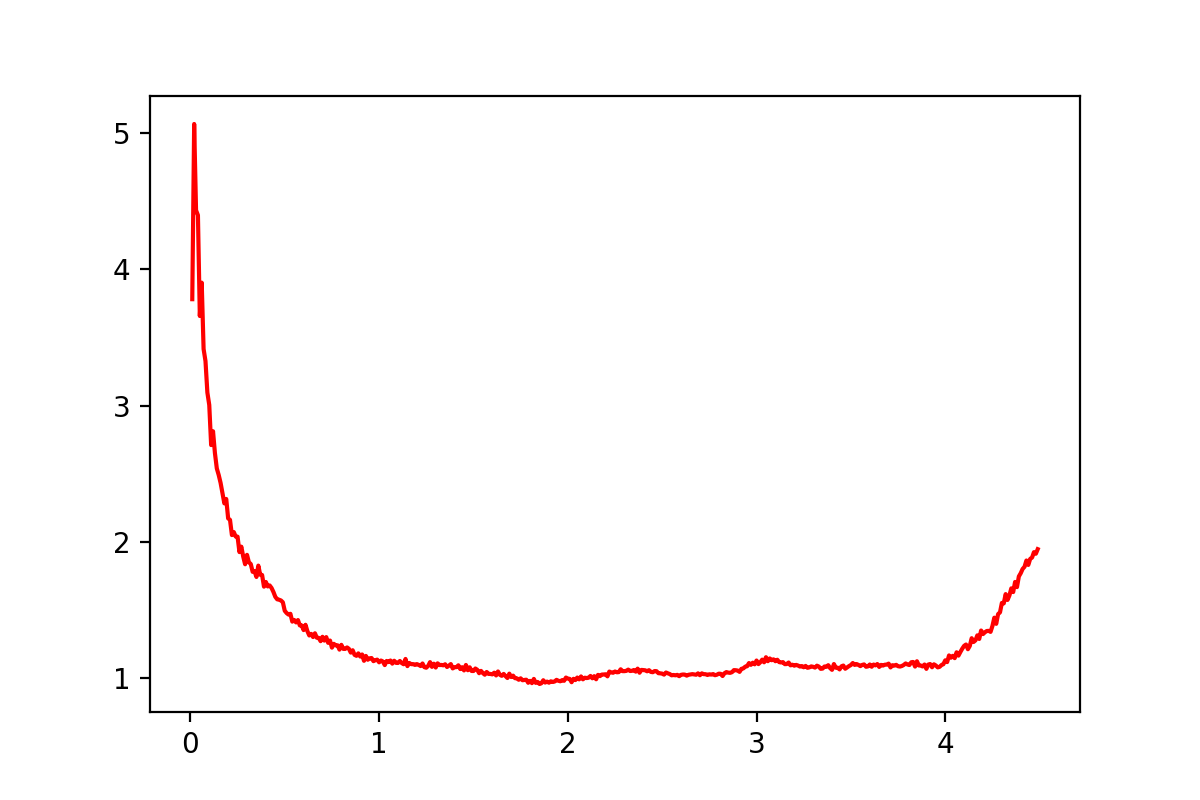

In [15]:
plt.figure()
plt.plot(radii1,g_r1,"r-",label='image 1')
plt.show()

In [37]:
print(np.sort(g_r1)[:100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03273905 0.0465     0.0707736  0.10055932
 0.56690186 0.57384412 0.59122694 0.59329934 0.59411844 0.60385708
 0.60554472 0.61119529 0.6115799  0.61211647 0.61557331 0.61714496
 0.61880645 0.62402491 0.62409073 0.62483092 0.62795401 0.62979843
 0.63234489 0.63311695 0.63344516 0.63467252 0.63665168 0.63762451
 0.63890088 0.63892889 0.63933578 0.6396624  0.63971858 0.64009684
 0.64054307 0.64214304 0.64239121 0.64254762 0.64298218 0.64369742
 0.64437399 0.6448184  0.645799   0.64703662 0.64729069 0.64945002
 0.65071328 0.65138977 0.65211347 0.65281198 0.65328481 0.65335595
 0.65371102 0.6545611  0.65497234 0.6558548  0.65620186 0.65655532
 0.65656939 0.65712105 0.65817767 0.65843406 0.65880936 0.6588283
 0.65969463 0.66045857 0.66055171 0.66207768 0.66268505 0.66335144
 0.66349208 0.66354338 0.66400784 0.66408772 0.66411072 0.66498991
 0.66537226 

In [38]:
1/0.03273905

30.544563754904313